In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm

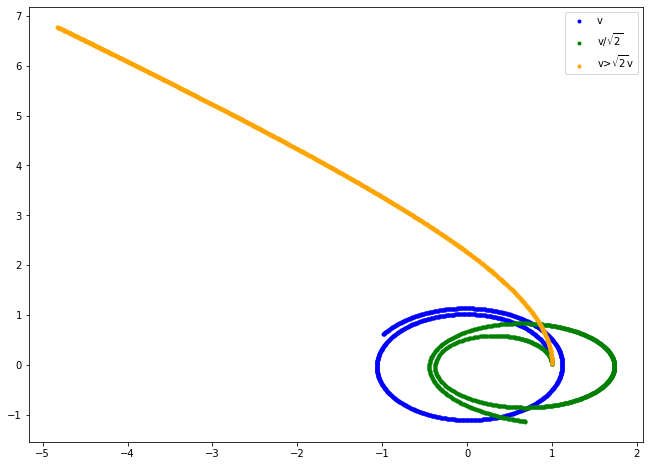

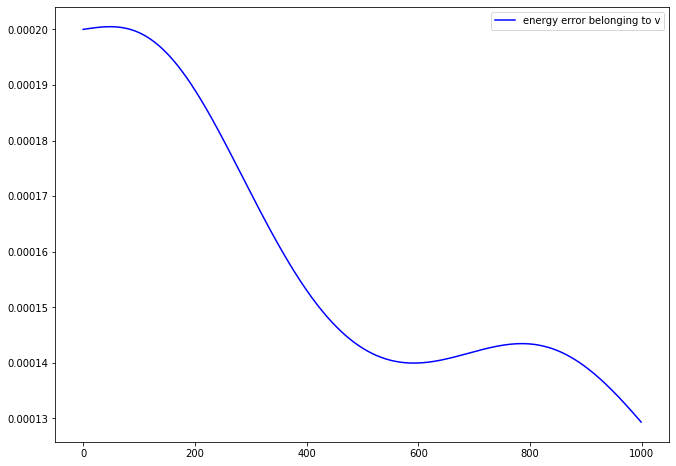

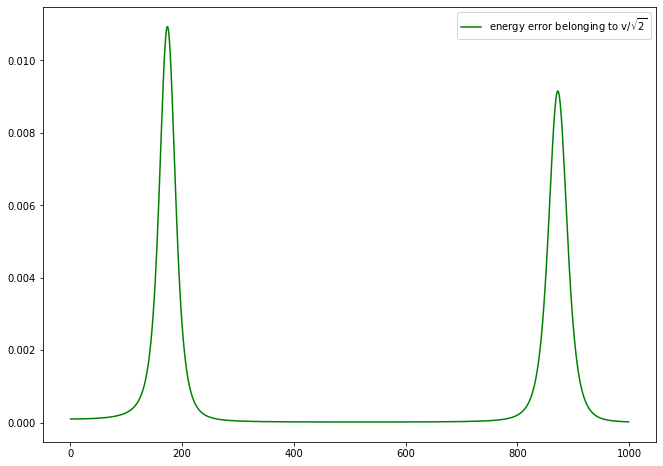

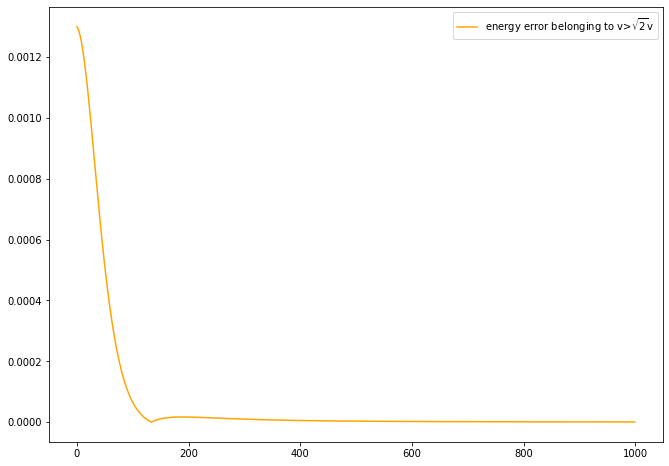

In [30]:
#look at the energy
def energy(w,s):
    return norm(w)**2/2 - 1/norm(s)

def energyerror(energy,E0): #this is the relative energy error
    return np.absolute(energy-E0)/np.absolute(E0)


#this are the variables you put in:
r = np.array([1,0]) #relative distance vector
v = np.array([0,1]) #velocity

g = 1 
m = 1 

#normalise the velocity and the distance vector according to the script
s0 = r/norm(r) #dimensionless distance vector
v0 = np.sqrt(g*m/norm(r)) #factor to turn the velocity into a dimensionless one
w0 = v/v0 #dimensionless velocity

#turn a 2D-vector into two lists to make it plot-able with scatter
def vector_to_list(List):
    x_list = []
    y_list = []
    for i in List:
        x_list.append(i[0])
        y_list.append(i[1])
    return x_list, y_list


#implement a "forward Euler" function (including a calculation of the energy and its error)
def forwardEuler(s0,w0,h,steps):
    S = [] #create lists to save data
    W = []
    E = []
    E_error = []
    for i in range(steps):
        s_i = s0+w0*h
        w_i = w0-(s0/norm(s0)**3)*h
        e = energy(w_i,s_i)
        e_error = energyerror(e,energy(w0,s0))
        S.append(s_i)
        W.append(w_i)
        E.append(e)
        E_error.append(e_error)
        s0 = s_i
        w0 = w_i
    x_s, y_s = vector_to_list(S)
    return x_s,y_s,W,E,E_error

#examples
x_s, y_s, W, E, dE = forwardEuler(s0,w0,0.01,1000) #circular movement
x_s2,y_s2, W2, E2, dE2 = forwardEuler(s0,w0/np.sqrt(2),0.01,1000)
x_s3,y_s3, W3, E3, dE3 = forwardEuler(s0,1.5*w0,0.01,1000)

#plot of the Euler scheme
plt.figure(figsize=(11,8))
plt.scatter(x_s, y_s, marker=".", label='v',color='blue')
plt.scatter(x_s2, y_s2, marker=".",label='v/$\sqrt{2}$',color='green')
plt.scatter(x_s3,y_s3, marker='.', label='v>$\sqrt{2}$v',color='orange')
plt.legend()

#plot of the energie errors
x = np.arange(0,1000,1)

plt.figure(figsize=(11,8)) #example1
plt.plot(x, dE,label='energy error belonging to v',color='blue')
plt.legend()

plt.figure(figsize=(11,8)) #example2
plt.plot(x,dE2,label='energy error belonging to v/$\sqrt{2}$',color='green')
plt.legend()

plt.figure(figsize=(11,8)) #example3
plt.plot(x,dE3,label='energy error belonging to v>$\sqrt{2}$v',color='orange')
plt.legend()

In [100]:
#the velocity vector has to be orthogonal to the distance vector to perform a circular movement
def orthogonal(a):
    b = []
    b.append(a[1])
    b.append(-a[0])
    return(b)

def w_circular(r):
    return orthogonal(r)/v0

w_circular([0,1])

array([1., 0.])